In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
import seaborn as sns

In [2]:
data = pd.read_csv("A:\project datasets\Crop_recommendation.csv")

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [6]:
print('Average Ratio of nitrogen in the soil :: {0:.2f}'.format(data['N'].mean()))
print('Average Ratio of phosphorous in the soil :: {0:.2f}'.format(data['P'].mean()))
print('Average Ratio of potassium in the soil :: {0:.2f}'.format(data['K'].mean()))
print('Average Temprature in Celsius :: {0:.2f}'.format(data['temperature'].mean()))
print('Average Relative Humidity in % :: {0:.2f}'.format(data['humidity'].mean()))
print('Average PH value of the soil :: {0:.2f}'.format(data['ph'].mean()))
print('Average Rainfall in mn :: {0:.2f}'.format(data['rainfall'].mean()))

Average Ratio of nitrogen in the soil :: 50.55
Average Ratio of phosphorous in the soil :: 53.36
Average Ratio of potassium in the soil :: 48.15
Average Temprature in Celsius :: 25.62
Average Relative Humidity in % :: 71.48
Average PH value of the soil :: 6.47
Average Rainfall in mn :: 103.46


In [7]:
@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label']==crops]
    print("---------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrogen required:", x['N'].min())
    print("Average Nitrogen required:", x['N'].mean())
    print("Maximum Nitrogen required:", x['N'].max())
    print("---------------------------------")
    print("Statistics for Phosphorus")
    print("Minimum Phosphorus required:", x['P'].min())
    print("Average Phosphorus required:", x['P'].mean())
    print("Maximum Phosphorus required:", x['P'].max())
    print("---------------------------------")
    print("Statistics for Temprature")
    print("Minimum Temprature required:{0:.2f}", x['temperature'].min())
    print("Average Temprature required:{0:.2f}", x['temperature'].mean())
    print("Maximum Temprature required:{0:.2f}", x['temperature'].max())
    print("---------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required:{0:.2f}", x['humidity'].min())
    print("Average Humidity required:{0:.2f}", x['humidity'].mean())
    print("Maximum Humidity required:{0:.2f}", x['humidity'].max())
    print("---------------------------------")
    print("Statistics for PH")
    print("Minimum PH required:{0:.2f}", x['ph'].min())
    print("Average PH required:{0:.2f}", x['ph'].mean())
    print("Maximum PH required:{0:.2f}", x['ph'].max())
    print("---------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required:{0:.2f}", x['rainfall'].min())
    print("Average Rainfall required:{0:.2f}", x['rainfall'].mean())
    print("Maximum Rainfall required:{0:.2f}", x['rainfall'].max())

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [8]:
@interact
def compare(conditions = ['N','P','K','temperature','humidity','ph','rainfall']):
    print('Average Value for', conditions,'is {0:.2f}'.format(data[conditions].mean()))
    print("----------------------------------------")
    print('Rice : {0:.2f}'.format(data[(data['label']=='rice')][conditions].mean()))
    print('Black Grams : {0:.2f}'.format(data[(data['label']=='blackgram')][conditions].mean()))
    print('Banana : {0:.2f}'.format(data[(data['label']=='banana')][conditions].mean()))
    print('Jute : {0:.2f}'.format(data[(data['label']=='jute')][conditions].mean()))
    print('Coconut : {0:.2f}'.format(data[(data['label']=='coconut')][conditions].mean()))
    print('Apple : {0:.2f}'.format(data[(data['label']=='apple')][conditions].mean()))
    print('Papaya : {0:.2f}'.format(data[(data['label']=='papaya')][conditions].mean()))
    print('Muskmelon : {0:.2f}'.format(data[(data['label']=='muskmelon')][conditions].mean()))
    print('Kidney Beans : {0:.2f}'.format(data[(data['label']=='kidneybeans')][conditions].mean()))
    print('Mung Beans : {0:.2f}'.format(data[(data['label']=='mungbean')][conditions].mean()))
    print('Oranges : {0:.2f}'.format(data[(data['label']=='orange')][conditions].mean()))
    print('Chick peas : {0:.2f}'.format(data[(data['label']=='chickpea')][conditions].mean()))
    print('Lentils : {0:.2f}'.format(data[(data['label']=='lentil')][conditions].mean()))
    print('Cotton : {0:.2f}'.format(data[(data['label']=='cotton')][conditions].mean()))
    print('Maize : {0:.2f}'.format(data[(data['label']=='maize')][conditions].mean()))
    print('Moth Beans : {0:.2f}'.format(data[(data['label']=='mothbeans')][conditions].mean()))
    print('Pigeon Peas : {0:.2f}'.format(data[(data['label']=='pigeonpeas')][conditions].mean()))
    print('Mango : {0:.2f}'.format(data[(data['label']=='mango')][conditions].mean()))
    print('Pomegranate : {0:.2f}'.format(data[(data['label']=='pomegranate')][conditions].mean()))
    print('Coffee : {0:.2f}'.format(data[(data['label']=='coffee')][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [9]:
@interact
def compares(conditions = ['N','P','K','temperature','humidity','ph','rainfall']):
    print("Crops which require greater than average", conditions,'\n')
    print(data[data[conditions]>data[conditions].mean()]['label'].unique())
    print("--------------------------------------------")
    print("Crops which require less than average", conditions,'\n')
    print(data[data[conditions]<=data[conditions].mean()]['label'].unique())
    


interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

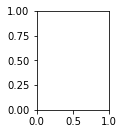

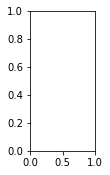

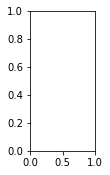

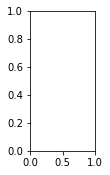

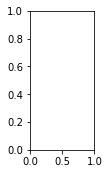

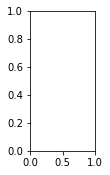

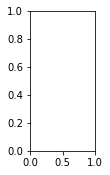

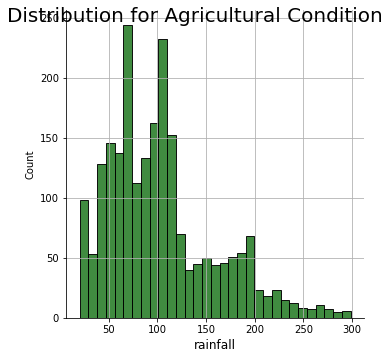

In [10]:
plt.subplot(2,4,1)
sns.displot(data['N'],color = 'red')
plt.xlabel('Ratio of Nitrogen', fontsize = 12)
plt.grid()

plt.subplot(2,4,2)
sns.displot(data['P'],color = 'orange')
plt.xlabel('Ratio of Phosphorus', fontsize = 12)
plt.grid()

plt.subplot(2,4,3)
sns.displot(data['K'],color= 'darkblue')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()

plt.subplot(2,4,4)
sns.displot(data['temperature'],color = 'black')
plt.xlabel('temperature', fontsize = 12)
plt.grid()

plt.subplot(2,4,5)
sns.displot(data['humidity'],color = 'grey')
plt.xlabel('humidity', fontsize = 12)
plt.grid()

plt.subplot(2,4,6)
sns.displot(data['ph'],color = 'lightgreen')
plt.xlabel('PH', fontsize = 12)
plt.grid()

plt.subplot(2,4,7)
sns.displot(data['rainfall'],color = 'darkgreen')
plt.xlabel('rainfall', fontsize = 12)
plt.grid()

plt.suptitle("Distribution for Agricultural Condition", fontsize = 20)
plt.show()

In [11]:
print('some Intresting patterns')
print("------------------------------")
print("Crops which requires very high ratio of Nitrogen content in soil:",data[data['N'] > 120]['label'].unique())
print("Crops which requires very high ratio of Phosphorus content in soil:",data[data['P'] > 100]['label'].unique())
print("Crops which requires very high ratio of Potassium content in soil:",data[data['K'] > 200]['label'].unique())
print("Crops which requires very high Rainfall:",data[data['rainfall'] > 200]['label'].unique())
print("Crops which requires very Low Temperature:",data[data['temperature'] > 10]['label'].unique())
print("Crops which requires very high Temperature :",data[data['temperature'] > 40]['label'].unique())
print("Crops which requires very Low Humidity:",data[data['humidity'] > 20]['label'].unique())
print("Crops which requires very Low PH:",data[data['ph'] > 4]['label'].unique())
print("Crops which requires very high PH:",data[data['ph'] > 9]['label'].unique())

some Intresting patterns
------------------------------
Crops which requires very high ratio of Nitrogen content in soil: ['cotton']
Crops which requires very high ratio of Phosphorus content in soil: ['grapes' 'apple']
Crops which requires very high ratio of Potassium content in soil: ['grapes' 'apple']
Crops which requires very high Rainfall: ['rice' 'papaya' 'coconut']
Crops which requires very Low Temperature: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
Crops which requires very high Temperature : ['grapes' 'papaya']
Crops which requires very Low Humidity: ['rice' 'maize' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes' 'watermelon'
 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton' 'jute' 'coffee']
Crops which requires very Low PH:

In [12]:

print("Summer Crops")
print(data[(data['temperature']>30)&(data['humidity']>50)]['label'].unique())
print('------------------------------------------')

print("Winter Crops")
print(data[(data['temperature']>20)&(data['humidity']>30)]['label'].unique())
print('------------------------------------------')

print("Rainy Crops")
print(data[(data['rainfall']>200)&(data['humidity']>50)]['label'].unique())
print('------------------------------------------')


Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
------------------------------------------
Winter Crops
['rice' 'maize' 'pigeonpeas' 'mothbeans' 'mungbean' 'blackgram' 'lentil'
 'pomegranate' 'banana' 'mango' 'grapes' 'watermelon' 'muskmelon' 'apple'
 'orange' 'papaya' 'coconut' 'cotton' 'jute' 'coffee']
------------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']
------------------------------------------


In [13]:
from sklearn.cluster import KMeans

x = data.drop(['label'],axis =1)

x = x.values
print(x.shape)

(2200, 7)


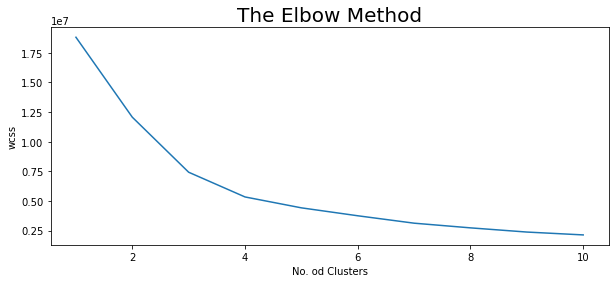

In [14]:
plt.rcParams['figure.figsize'] = (10,4)

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter = 300, n_init = 10,random_state =0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. od Clusters')
plt.ylabel('wcss')
plt.show()

In [15]:
km = KMeans(n_clusters= 4, init= 'k-means++',max_iter= 300, n_init= 10 , random_state= 0)
y_means = km.fit_predict(x)

a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means,a],axis = 1)
z = z.rename(columns = {0: 'cluster'})

print("lets check the results after applying the K Means Clustering Analysis \n")
print("Crops in first cluster :",z[z['cluster']==0]['label'].unique())
print("--------------------------------------------------------------")

print("Crops in Second cluster :",z[z['cluster']==1]['label'].unique())
print("--------------------------------------------------------------")

print("Crops in Third cluster :",z[z['cluster']==2]['label'].unique())
print("--------------------------------------------------------------")

print("Crops in Forth cluster :",z[z['cluster']==3]['label'].unique())




lets check the results after applying the K Means Clustering Analysis 

Crops in first cluster : ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
--------------------------------------------------------------
Crops in Second cluster : ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
--------------------------------------------------------------
Crops in Third cluster : ['grapes' 'apple']
--------------------------------------------------------------
Crops in Forth cluster : ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']


In [16]:
y = data['label']
x = data.drop(['label'], axis =1)

print('shape of x:', x.shape)
print('shape of y:', y.shape)


shape of x: (2200, 7)
shape of y: (2200,)


In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

C:\Users\Pratham pratap singh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<function matplotlib.pyplot.show(close=None, block=None)>

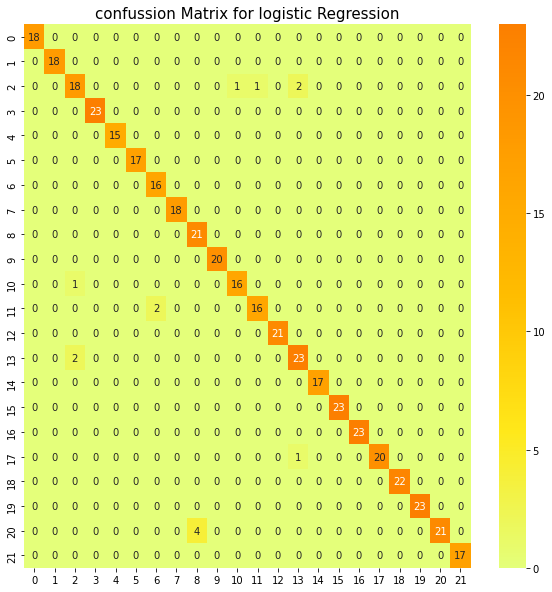

In [19]:
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize']= (10,10)
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm,annot= True , cmap = 'Wistia')
plt.title('confussion Matrix for logistic Regression', fontsize = 15)
plt.show

In [20]:
 from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [21]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [23]:
prediction = model.predict((np.array([[25,60,80,33,20,7.4,180]])))
print('the suggested crop for given climate condition is:', prediction)

the suggested crop for given climate condition is: ['papaya']
